In [1126]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker
import requests
from sklearn.preprocessing import MinMaxScaler

In [1061]:
paises = pd.read_excel('https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/paises.xlsx')
paises.head()

c:\Users\ASUS\Desktop\Dados\Tech-Challenge-1\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Consumption,2007.00,1000 hl,10.00
1,Asia,Afghanistan,Wine,Imports,2007.00,1000 hl,10.00
2,Asia,Afghanistan,Wine,Production,2007.00,1000 hl,0.00
3,Asia,Afghanistan,Wine,Consumption,2008.00,1000 hl,1.00
4,Asia,Afghanistan,Wine,Imports,2008.00,1000 hl,1.00


In [1062]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [1063]:
paises.tail()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
12547,Africa,Zimbabwe,Wine,Exports,2022.00,1000 hl,0.00
12548,Africa,Zimbabwe,Wine,Imports,2022.00,1000 hl,11.00
12549,Africa,Zimbabwe,Wine,Production,2022.00,1000 hl,14.00
12550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12551,Filtros aplicados:\nLanguage é EN\nProduct é W...,NaN,NaN,NaN,NaN,NaN,NaN


In [1064]:
paises = paises.iloc[:-2]

In [1065]:
paises.head(10)

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Consumption,2007.00,1000 hl,10.00
1,Asia,Afghanistan,Wine,Imports,2007.00,1000 hl,10.00
2,Asia,Afghanistan,Wine,Production,2007.00,1000 hl,0.00
3,Asia,Afghanistan,Wine,Consumption,2008.00,1000 hl,1.00
4,Asia,Afghanistan,Wine,Imports,2008.00,1000 hl,1.00
5,Asia,Afghanistan,Wine,Production,2008.00,1000 hl,0.00
6,Asia,Afghanistan,Wine,Consumption,2009.00,1000 hl,3.00
7,Asia,Afghanistan,Wine,Imports,2009.00,1000 hl,3.00
8,Asia,Afghanistan,Wine,Production,2009.00,1000 hl,0.00
9,Asia,Afghanistan,Wine,Consumption,2010.00,1000 hl,2.00


In [1066]:
paises.shape

(12550, 7)

In [1067]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12550 entries, 0 to 12549
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       12550 non-null  object 
 1   Region/Country  12550 non-null  object 
 2   Product         12550 non-null  object 
 3   Variable        12550 non-null  object 
 4   Year            12550 non-null  float64
 5   Unit            12550 non-null  object 
 6   Quantity        12550 non-null  float64
dtypes: float64(2), object(5)
memory usage: 686.5+ KB


In [1068]:
# alterando o nome das colunas
paises.columns = ['Continente', 'País', 'Produto', 'Categoria', 'Ano', 'Unidade',
       'Quantidade']

In [1069]:
paises.head()

,Continente,País,Produto,Categoria,Ano,Unidade,Quantidade
0,Asia,Afghanistan,Wine,Consumption,2007.00,1000 hl,10.00
1,Asia,Afghanistan,Wine,Imports,2007.00,1000 hl,10.00
2,Asia,Afghanistan,Wine,Production,2007.00,1000 hl,0.00
3,Asia,Afghanistan,Wine,Consumption,2008.00,1000 hl,1.00
4,Asia,Afghanistan,Wine,Imports,2008.00,1000 hl,1.00


In [1070]:
paises['Produto'].unique()

array(['Wine'], dtype=object)

In [1071]:
# Excluindo a coluna Produto pois toda a tabela se trata apenas de um produto Vinho 
paises.drop('Produto',axis = 1,inplace = True)

In [1072]:
paises['Categoria'].unique()

array(['Consumption', 'Imports', 'Production', 'Exports'], dtype=object)

In [1073]:
# traduzindo para o portugues a coluna categoria
paises['Categoria'] = paises['Categoria'].str.replace('Consumption','Consumo')
paises['Categoria'] = paises['Categoria'].str.replace('Imports','Importação')
paises['Categoria'] = paises['Categoria'].str.replace('Production','Produção')
paises['Categoria'] = paises['Categoria'].str.replace('Exports','Exportação')
paises['Categoria'].unique()

array(['Consumo', 'Importação', 'Produção', 'Exportação'], dtype=object)

In [1074]:
# Traduzindo para o portugues a coluna de continente
paises['Continente'] = paises['Continente'].str.replace('Europe','Europa')
paises['Continente'].unique()

array(['Asia', 'Europa', 'Africa', 'Oceania', 'America', 'Global'],
      dtype=object)

In [1075]:
paises.head()

,Continente,País,Categoria,Ano,Unidade,Quantidade
0,Asia,Afghanistan,Consumo,2007.00,1000 hl,10.00
1,Asia,Afghanistan,Importação,2007.00,1000 hl,10.00
2,Asia,Afghanistan,Produção,2007.00,1000 hl,0.00
3,Asia,Afghanistan,Consumo,2008.00,1000 hl,1.00
4,Asia,Afghanistan,Importação,2008.00,1000 hl,1.00


In [1076]:
paises['Ano'] = paises['Ano'].astype(str)
paises['Ano'] = paises['Ano'].str[:-2]
paises['Ano'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [1077]:
paises.head()

,Continente,País,Categoria,Ano,Unidade,Quantidade
0,Asia,Afghanistan,Consumo,2007,1000 hl,10.00
1,Asia,Afghanistan,Importação,2007,1000 hl,10.00
2,Asia,Afghanistan,Produção,2007,1000 hl,0.00
3,Asia,Afghanistan,Consumo,2008,1000 hl,1.00
4,Asia,Afghanistan,Importação,2008,1000 hl,1.00


In [1078]:
# a coluna Unidade esta em hectolitro ao inves de litro primeiro vamos converter para litro
paises['Unidade'].unique()

array(['1000\xa0hl'], dtype=object)

In [1079]:
# convertendo para litro
paises['Unidade'] = 100_000

In [1080]:
# agora vamos multiplicar a coluna unidade por quantidade para saber o valor em litro 
paises['Quantidade'] = paises['Unidade'] * paises['Quantidade']

In [1081]:
# podemos apagar a coluna Unidade e deixar somente a coluna Quantidade
paises.drop('Unidade',axis= 1,inplace = True)

In [1082]:
paises.rename(columns={'Quantidade':'Quantidade(L)'},inplace=True)

In [1083]:
paises.head(10)

,Continente,País,Categoria,Ano,Quantidade(L)
0,Asia,Afghanistan,Consumo,2007,1000000.00
1,Asia,Afghanistan,Importação,2007,1000000.00
2,Asia,Afghanistan,Produção,2007,0.00
3,Asia,Afghanistan,Consumo,2008,100000.00
4,Asia,Afghanistan,Importação,2008,100000.00
5,Asia,Afghanistan,Produção,2008,0.00
6,Asia,Afghanistan,Consumo,2009,300000.00
7,Asia,Afghanistan,Importação,2009,300000.00
8,Asia,Afghanistan,Produção,2009,0.00
9,Asia,Afghanistan,Consumo,2010,200000.00


In [1084]:
total_por_pais = paises.groupby(['Continente','País','Categoria'])['Quantidade(L)'].sum().reset_index()
total_por_pais

,Continente,País,Categoria,Quantidade(L)
0,Africa,Algeria,Consumo,463200000.00
1,Africa,Algeria,Exportação,9000000.00
2,Africa,Algeria,Importação,99200000.00
3,Africa,Algeria,Produção,503300000.00
4,Africa,Angola,Consumo,1299900000.00
...,...,...,...,...
780,Oceania,Tuvalu,Importação,500000.00
781,Oceania,Tuvalu,Produção,0.00
782,Oceania,Vanuatu,Consumo,7400000.00
783,Oceania,Vanuatu,Importação,6900000.00


In [1085]:
total_pivot = total_por_pais.pivot(index='País',columns='Categoria',values='Quantidade(L)')
total_pivot

Categoria,Consumo,Exportação,Importação,Produção
País,,,,
Afghanistan,2800000.00,NaN,2700000.00,0.00
Albania,355300000.00,0.00,60500000.00,298600000.00
Algeria,463200000.00,9000000.00,99200000.00,503300000.00
American Samoa,400000.00,NaN,200000.00,0.00
Andorra,NaN,NaN,NaN,0.00
...,...,...,...,...
Vietnam,130300000.00,NaN,132500000.00,0.00
Virgin Islands,NaN,NaN,3800000.00,0.00
Yemen,0.00,0.00,0.00,0.00


In [1086]:
total_pivot.fillna(0,inplace=True)

In [1087]:
total_pivot = total_pivot.reset_index()

In [1088]:
total_pivot.sort_values(by = 'Importação',ascending=False,inplace = True)
total_pivot = total_pivot.iloc[1:]

In [1089]:
# pegando apenas os top 40 que mais importaram vinho nos ultimos 15 anos 
total_pivot = total_pivot[:40]

In [1090]:
lista_de_paises = total_pivot['País'].unique()
print(lista_de_paises)

['Germany' 'United Kingdom' 'United States of America' 'France' 'Russia'
 'China, mainland' 'Netherlands' 'Canada' 'Belgium' 'Japan' 'Italy'
 'Sweden' 'Portugal' 'Denmark' 'Switzerland' 'Czech Republic' 'Poland'
 'Brazil' 'Norway' 'Australia' 'Angola' 'Lithuania' 'Ireland' 'Austria'
 'Spain' 'Finland' 'Slovakia' 'Latvia' 'Mexico' 'Belarus'
 'China, Hong Kong SAR' 'Romania' 'Ukraine' 'Korea (the Republic of)'
 'New Zealand' "Côte d'Ivoire" 'United Arab Emirates' 'Namibia'
 'Singapore' 'Paraguay']


In [1091]:
paises_filtrados = paises[paises['País'].isin(lista_de_paises)]

In [1092]:
paises_filtrados['País'].unique()

array(['Angola', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil',
       'Canada', 'China, Hong Kong SAR', 'China, mainland',
       "Côte d'Ivoire", 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Ireland', 'Italy', 'Japan', 'Korea (the Republic of)',
       'Latvia', 'Lithuania', 'Mexico', 'Namibia', 'Netherlands',
       'New Zealand', 'Norway', 'Paraguay', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Singapore', 'Slovakia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'], dtype=object)

In [1093]:
# Dicionário de tradução dos países para o português
paises_traduzidos = {
    'Angola': 'Angola','Australia': 'Austrália','Austria': 'Áustria','Belarus': 'Bielorrússia','Belgium': 'Bélgica',
    'Brazil': 'Brasil','Canada': 'Canadá','China, Hong Kong SAR': 'Hong Kong','China, mainland': 'China',"Côte d'Ivoire": 'Costa do Marfim',
    'Czech Republic': 'República Tcheca','Denmark': 'Dinamarca','Finland': 'Finlândia','France': 'França','Germany': 'Alemanha',
    'Ireland': 'Irlanda','Italy': 'Itália','Japan': 'Japão','Korea (the Republic of)': 'Coreia do Sul','Latvia': 'Letônia',
    'Lithuania': 'Lituânia','Mexico': 'México','Namibia': 'Namíbia','Netherlands': 'Países Baixos','New Zealand': 'Nova Zelândia',
    'Norway': 'Noruega','Paraguay': 'Paraguai','Poland': 'Polônia','Portugal': 'Portugal','Romania': 'Romênia','Russia': 'Rússia',
    'Singapore': 'Singapura','Slovakia': 'Eslováquia','Spain': 'Espanha','Sweden': 'Suécia','Switzerland': 'Suíça','Ukraine': 'Ucrânia',
    'United Arab Emirates': 'Emirados Árabes Unidos','United Kingdom': 'Reino Unido','United States of America': 'Estados Unidos'
}
# Substituindo o nome dos países 
paises_filtrados['País'] = paises_filtrados['País'].replace(paises_traduzidos)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_480\1110843042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises_filtrados['País'] = paises_filtrados['País'].replace(paises_traduzidos)


In [1094]:
paises_filtrados['País'].unique()

array(['Angola', 'Austrália', 'Áustria', 'Bielorrússia', 'Bélgica',
       'Brasil', 'Canadá', 'Hong Kong', 'China', 'Costa do Marfim',
       'República Tcheca', 'Dinamarca', 'Finlândia', 'França', 'Alemanha',
       'Irlanda', 'Itália', 'Japão', 'Coreia do Sul', 'Letônia',
       'Lituânia', 'México', 'Namíbia', 'Países Baixos', 'Nova Zelândia',
       'Noruega', 'Paraguai', 'Polônia', 'Portugal', 'Romênia', 'Rússia',
       'Singapura', 'Eslováquia', 'Espanha', 'Suécia', 'Suíça', 'Ucrânia',
       'Emirados Árabes Unidos', 'Reino Unido', 'Estados Unidos'],
      dtype=object)

In [1095]:
paises_filtrados.head()

,Continente,País,Categoria,Ano,Quantidade(L)
240,Africa,Angola,Consumo,2007,102700000.00
241,Africa,Angola,Exportação,2007,0.00
242,Africa,Angola,Importação,2007,102800000.00
243,Africa,Angola,Produção,2007,0.00
244,Africa,Angola,Consumo,2008,116000000.00


In [1096]:
# excluindo o Brasil da Lista de Países 
paises_filtrados = paises_filtrados[paises_filtrados['País'] != 'Brasil']

In [1097]:
paises_filtrados['País'].unique()

array(['Angola', 'Austrália', 'Áustria', 'Bielorrússia', 'Bélgica',
       'Canadá', 'Hong Kong', 'China', 'Costa do Marfim',
       'República Tcheca', 'Dinamarca', 'Finlândia', 'França', 'Alemanha',
       'Irlanda', 'Itália', 'Japão', 'Coreia do Sul', 'Letônia',
       'Lituânia', 'México', 'Namíbia', 'Países Baixos', 'Nova Zelândia',
       'Noruega', 'Paraguai', 'Polônia', 'Portugal', 'Romênia', 'Rússia',
       'Singapura', 'Eslováquia', 'Espanha', 'Suécia', 'Suíça', 'Ucrânia',
       'Emirados Árabes Unidos', 'Reino Unido', 'Estados Unidos'],
      dtype=object)

### Consumo

In [1098]:
paises_filtrados_consumo = paises_filtrados[paises_filtrados['Categoria'] == 'Consumo']
paises_filtrados_consumo = paises_filtrados_consumo.fillna(0)
paises_filtrados_consumo.head(3)

,Continente,País,Categoria,Ano,Quantidade(L)
240,Africa,Angola,Consumo,2007,102700000.00
244,Africa,Angola,Consumo,2008,116000000.00
248,Africa,Angola,Consumo,2009,79800000.00


In [1099]:
consumo_total_por_pais = paises_filtrados_consumo.groupby('País')['Quantidade(L)'].sum()
consumo_total_por_pais = consumo_total_por_pais.sort_values(ascending = False).reset_index()


In [1100]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_popula%C3%A7%C3%A3o'

# Fazendo a requisição usando requests
response = requests.get(url)

# Verifica se a requisição foi bem sucedida
if response.status_code == 200:
    # Lendo o HTML para um DataFrame
    populacao = pd.read_html(response.text)[0]
    populacao.head()
else:
    print("Falha ao acessar o site. Status code:", response.status_code)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_480\627939832.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  populacao = pd.read_html(response.text)[0]


In [1101]:
populacao.head()

,Unnamed: 0,Posição,País (ou território dependente),Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,NaN,1,Índia,1 429 921 746,+269.108.746,Estimativa oficial
1,NaN,2,China,1 426 391 281,+87.778.313,Censo oficial
2,NaN,3,Estados Unidos,339 987 103,+31.241.565,Censo oficial
3,NaN,4,Indonésia,277 184 719,+33.168.546,Estimativa oficial
4,NaN,5,Paquistão,240 215 932,+65.636.932,Estimativa oficial


In [1102]:
populacao = populacao.drop(['Unnamed: 0','Posição','Crescimento desde a última estimativa','Estimativa Oficial'],axis=1)



In [1103]:
paises_errados = {'Polônia' :'Polônia', 'Letónia': 'Letônia',  'Hong Kong (China)': 'Hong Kong',
                    'Chéquia':'República Tcheca','Roménia': 'Romênia'}

populacao['País (ou território dependente)'] = populacao['País (ou território dependente)'].replace(paises_errados)


In [1104]:
populacao = populacao[populacao['País (ou território dependente)'].isin(paises_filtrados['País'].unique())]
populacao.columns = ['País', 'População']



In [1105]:
populacao['População'] = populacao['População'].str.replace(' ','').astype(int)

In [1106]:
consumo_per_capita = pd.merge(consumo_total_por_pais,populacao)
consumo_per_capita['Consumo Per Capita Média por ano(L)'] = (consumo_per_capita['Quantidade(L)'] / 15 ) / consumo_per_capita['População']
consumo_per_capita.sort_values(by = 'Consumo Per Capita Média por ano(L)',ascending=False,inplace=True)

In [1107]:
paises_filtrados_consumo_pivot = paises_filtrados_consumo.pivot(index='País',columns='Ano',values='Quantidade(L)')
paises_filtrados_consumo_pivot.head()

Ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Alemanha,2078200000.00,2074700000.00,2022400000.00,2020000000.00,1970700000.00,2030000000.00,2040000000.00,2030000000.00,2050000000.00,2020000000.00,2014500000.00,1974500000.00,1945000000.00,1984400000.00,1990000000.00,1940000000.00
Angola,102700000.00,116000000.00,79800000.00,86800000.00,90800000.00,99000000.00,101700000.00,134400000.00,135000000.00,91600000.00,75900000.00,54900000.00,36200000.00,31700000.00,31700000.00,31700000.00
Austrália,486900000.00,504300000.00,512200000.00,538900000.00,540600000.00,542000000.00,537900000.00,541800000.00,547600000.00,538000000.00,536000000.00,527200000.00,580300000.00,595000000.00,560400000.00,540300000.00
Bielorrússia,61600000.00,66900000.00,63500000.00,68400000.00,73300000.00,75700000.00,79600000.00,81200000.00,79300000.00,75600000.00,80100000.00,86400000.00,92700000.00,98400000.00,96000000.00,96000000.00
Bélgica,290000000.00,299000000.00,285000000.00,276000000.00,291700000.00,287200000.00,288600000.00,266600000.00,296600000.00,280200000.00,281800000.00,273500000.00,265900000.00,265500000.00,238200000.00,206600000.00


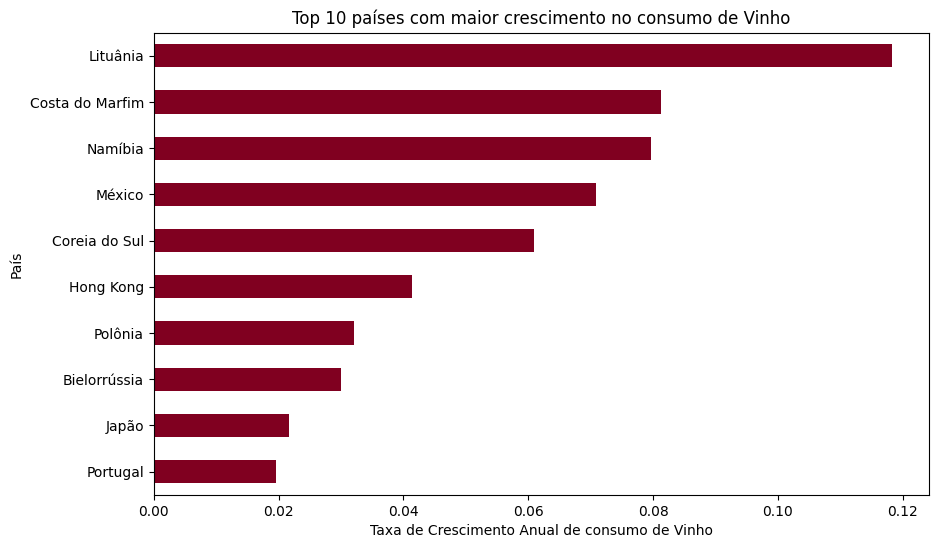

In [1108]:
# calculando a taxa de crescimento anual composta de consumo de vinhos para cada país(CARG Consumo)
carg_consumo = (paises_filtrados_consumo_pivot.iloc[:, -1] / paises_filtrados_consumo_pivot.iloc[:, 0]) ** (1 / (paises_filtrados_consumo_pivot.shape[1] - 1)) - 1
# ordenando os países com maior CARG CONSUMO
carg_consumo = carg_consumo.sort_values(ascending=False)
# selecionando os top 10 com maior taxa de crescimento anual composta de consumo de vinho 
top_10_paises_consumo = carg_consumo.head(10)
# plotando em um grafico de barra os top 15
plt.figure(figsize=(10, 6))
top_10_paises_consumo.plot(kind='barh', color='#800020')  # Cor vinho
plt.title('Top 10 países com maior crescimento no consumo de Vinho')
plt.xlabel('Taxa de Crescimento Anual de consumo de Vinho')
plt.ylabel('País')
plt.gca().invert_yaxis()  # Inverter a ordem dos países para o maior no topo
plt.show()

In [1109]:
top10_crescimento_consumo = paises_filtrados_consumo[paises_filtrados_consumo['País'].isin(top_10_paises_consumo.index)]
top10_crescimento_consumo

,Continente,País,Categoria,Ano,Quantidade(L)
976,Europa,Bielorrússia,Consumo,2007,61600000.00
980,Europa,Bielorrússia,Consumo,2008,66900000.00
984,Europa,Bielorrússia,Consumo,2009,63500000.00
988,Europa,Bielorrússia,Consumo,2010,68400000.00
992,Europa,Bielorrússia,Consumo,2011,73300000.00
...,...,...,...,...,...
9123,Europa,Portugal,Consumo,2018,507300000.00
9127,Europa,Portugal,Consumo,2019,539000000.00
9131,Europa,Portugal,Consumo,2020,437400000.00
9135,Europa,Portugal,Consumo,2021,526900000.00


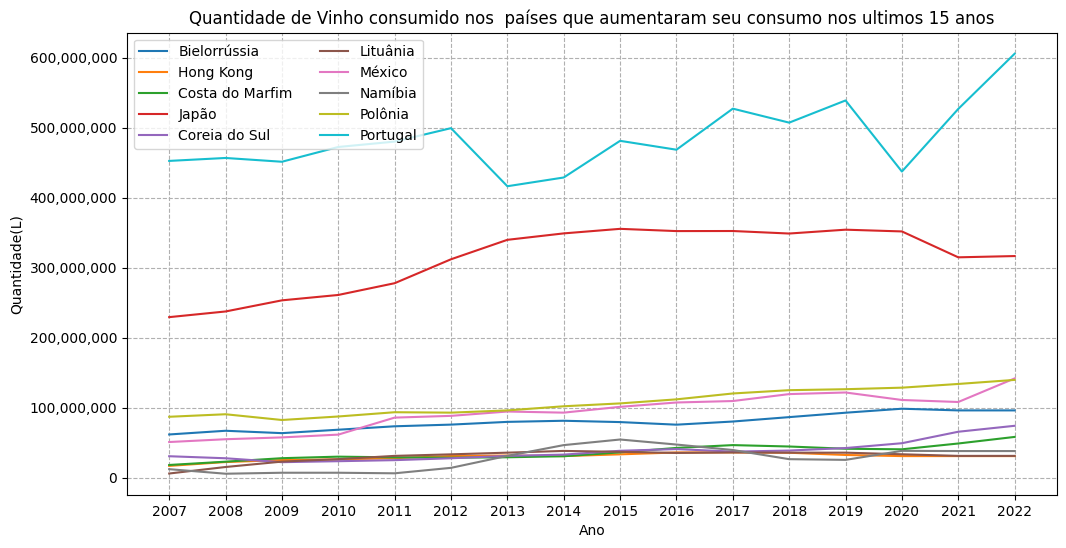

In [1110]:
plt.figure(figsize= (12,6))
axis = sns.lineplot(data = top10_crescimento_consumo , x = "Ano", y ='Quantidade(L)',hue='País')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Quantidade de Vinho consumido nos  países que aumentaram seu consumo nos ultimos 15 anos')
plt.grid(linestyle = '--')
plt.show()

### Produção 

In [1111]:
paises_filtrados_producao = paises_filtrados[paises_filtrados['Categoria'] == 'Produção']
paises_filtrados_producao = paises_filtrados_producao.fillna(0)
paises_filtrados_producao.head(3)

,Continente,País,Categoria,Ano,Quantidade(L)
243,Africa,Angola,Produção,2007,0.00
247,Africa,Angola,Produção,2008,0.00
251,Africa,Angola,Produção,2009,0.00


In [1112]:
paises_filtrados_producao_pivot = paises_filtrados_producao.pivot(index='País',columns='Ano',values='Quantidade(L)')
paises_filtrados_producao_pivot.head()


Ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Alemanha,1026100000.00,999100000.00,922800000.00,690600000.00,913200000.00,901200000.00,840900000.00,920200000.00,881900000.00,901300000.00,746200000.00,1026800000.00,821800000.00,840500000.00,844800000.00,894000000.00
Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Austrália,962000000.00,1244800000.00,1178400000.00,1142000000.00,1118000000.00,1225900000.00,1231000000.00,1186300000.00,1191200000.00,1310000000.00,1369000000.00,1274000000.00,1197000000.00,1090000000.00,1482000000.00,1307000000.00
Bielorrússia,20000000.00,25700000.00,21000000.00,25100000.00,26800000.00,27200000.00,28200000.00,30000000.00,28700000.00,27400000.00,31000000.00,32000000.00,34000000.00,30400000.00,30400000.00,30400000.00
Bélgica,200000.00,600000.00,600000.00,500000.00,500000.00,300000.00,600000.00,700000.00,1000000.00,800000.00,900000.00,2000000.00,1500000.00,1800000.00,1300000.00,3000000.00


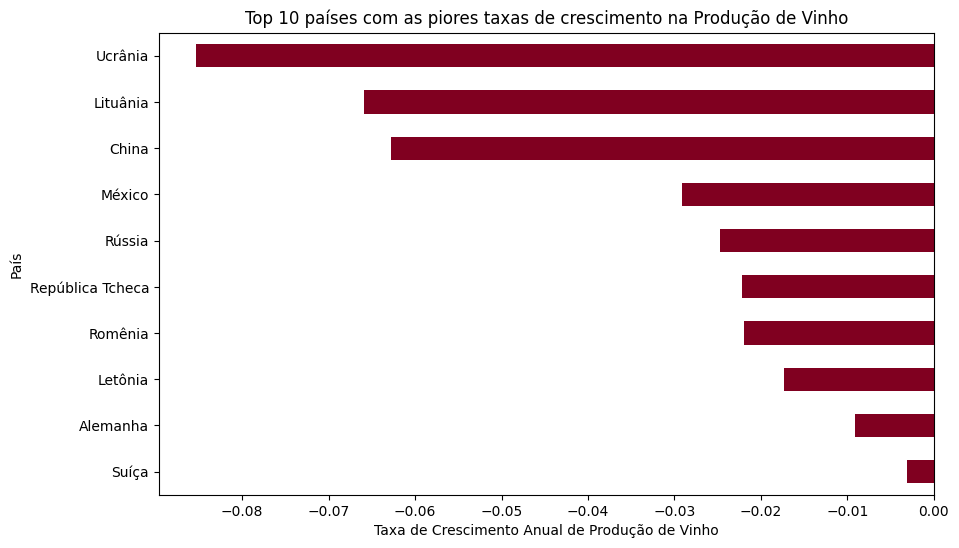

In [1113]:
# calculando a taxa de crescimento anual composta de produção de vinhos para cada país(CARG Consumo)
carg_producao = (paises_filtrados_producao_pivot.iloc[:, -1] / paises_filtrados_producao_pivot.iloc[:, 0]) ** (1 / (paises_filtrados_producao_pivot.shape[1] - 1)) - 1
# ordenando os países com menor CARG Producao
carg_producao = carg_producao.sort_values(ascending=True)
# selecionando os top 15 com maior taxa de crescimento anual composta de consumo de vinho 
top_10_paises_menores_producao = carg_producao.head(10)
# plotando em um grafico de barra os top 10
plt.figure(figsize=(10, 6))
top_10_paises_menores_producao.plot(kind='barh', color='#800020')  # Cor vinho
plt.title('Top 10 países com as piores taxas de crescimento na Produção de Vinho')
plt.xlabel('Taxa de Crescimento Anual de Produção de Vinho')
plt.ylabel('País')
plt.gca().invert_yaxis()  # Inverter a ordem dos países para o menor no topo
plt.show()

In [1114]:
top10_decrescimento_producao = paises_filtrados_producao[paises_filtrados_producao['País'].isin(top_10_paises_menores_producao.index)]
top10_decrescimento_producao

,Continente,País,Categoria,Ano,Quantidade(L)
2466,Asia,China,Produção,2007,1250000000.00
2470,Asia,China,Produção,2008,1260000000.00
2474,Asia,China,Produção,2009,1280000000.00
2478,Asia,China,Produção,2010,1300000000.00
2482,Asia,China,Produção,2011,1342600000.00
...,...,...,...,...,...
11845,Europa,Ucrânia,Produção,2018,101000000.00
11849,Europa,Ucrânia,Produção,2019,99000000.00
11853,Europa,Ucrânia,Produção,2020,66000000.00
11857,Europa,Ucrânia,Produção,2021,66000000.00


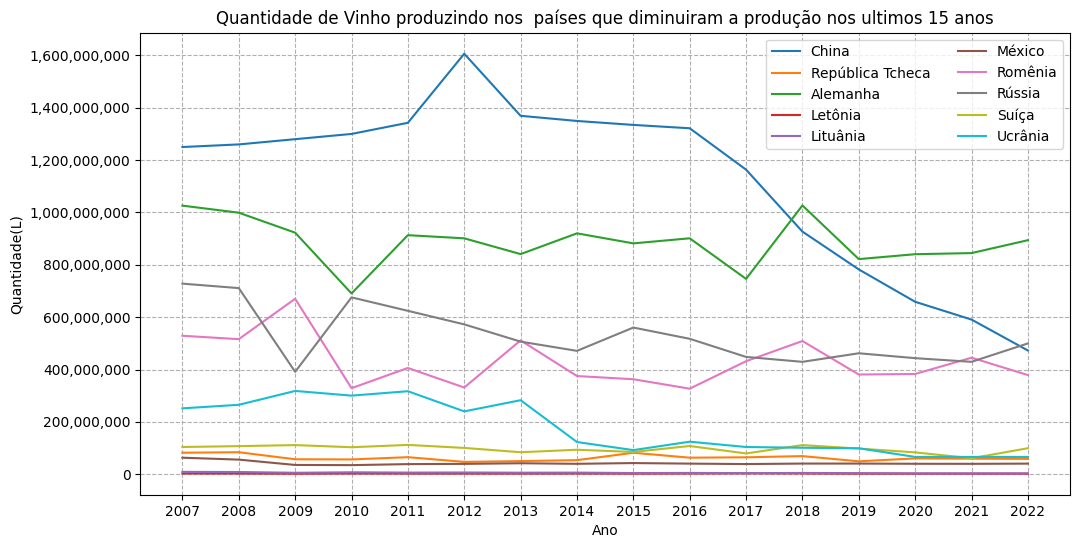

In [1115]:
plt.figure(figsize= (12,6))
axis = sns.lineplot(data = top10_decrescimento_producao , x = "Ano", y ='Quantidade(L)',hue='País')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)
plt.title('Quantidade de Vinho produzindo nos  países que diminuiram a produção nos ultimos 15 anos')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle = '--')
plt.show()

### Importação 

In [1116]:
paises_filtrados_importacao = paises_filtrados[paises_filtrados['Categoria'] == 'Importação']
paises_filtrados_importacao = paises_filtrados_importacao.fillna(0)
paises_filtrados_importacao.head(3)


,Continente,País,Categoria,Ano,Quantidade(L)
242,Africa,Angola,Importação,2007,102800000.00
246,Africa,Angola,Importação,2008,116000000.00
250,Africa,Angola,Importação,2009,79800000.00


In [1117]:
paises_filtrados_importacao_pivot = paises_filtrados_importacao.pivot(index='País',columns='Ano',values='Quantidade(L)')
paises_filtrados_importacao_pivot.head(3)


Ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,
Alemanha,1455300000.00,1370800000.00,1411000000.00,1477800000.00,1613300000.00,1537400000.00,1527400000.00,1548200000.00,1542000000.00,1485100000.00,1523000000.00,1465600000.00,1480200000.00,1448600000.00,1478100000.00,1361400000.00
Angola,102800000.00,116000000.00,79800000.00,86800000.00,94800000.00,103100000.00,100300000.00,168600000.00,101500000.00,85000000.00,127000000.00,41700000.00,35300000.00,26700000.00,21800000.00,40700000.00
Austrália,34800000.00,65300000.00,62200000.00,67900000.00,67600000.00,83100000.00,83000000.00,81800000.00,91400000.00,86700000.00,92800000.00,99200000.00,100200000.00,104600000.00,105100000.00,108300000.00


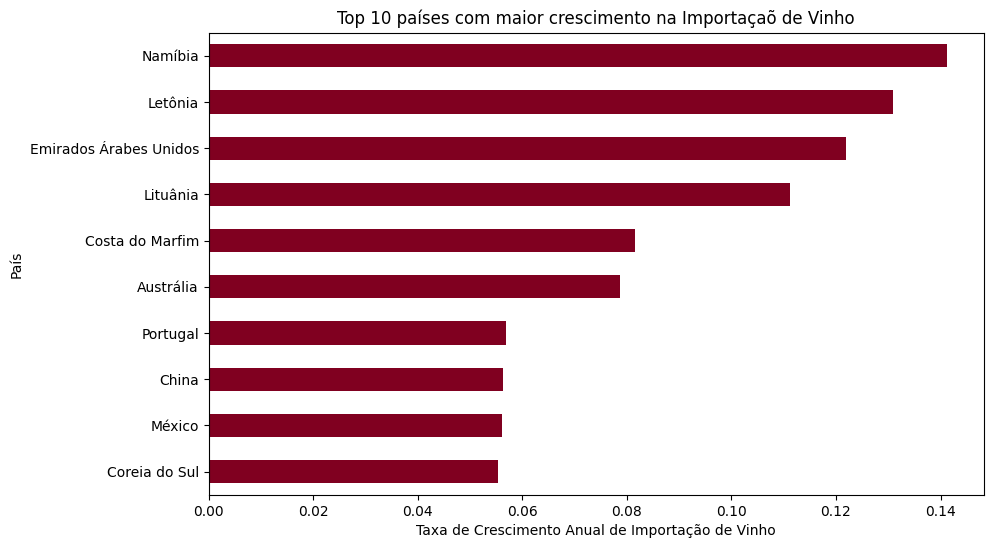

In [1118]:
# calculando a taxa de crescimento anual composta de importacao de vinhos para cada país(CARG Importação)
carg_importacao = (paises_filtrados_importacao_pivot.iloc[:, -1] / paises_filtrados_importacao_pivot.iloc[:, 0]) ** (1 / (paises_filtrados_importacao_pivot.shape[1] - 1)) - 1
# ordenando os países com menor CARG Producao
carg_importacao = carg_importacao.sort_values(ascending=False)
# selecionando os top 15 com maior taxa de crescimento anual composta de importação de vinho 
top_10_paises_importacao = carg_importacao.head(10)
# plotando em um grafico de barra os top 10
plt.figure(figsize=(10, 6))
top_10_paises_importacao.plot(kind='barh', color='#800020')  # Cor vinho
plt.title('Top 10 países com maior crescimento na Importaçaõ de Vinho')
plt.xlabel('Taxa de Crescimento Anual de Importação de Vinho')
plt.ylabel('País')
plt.gca().invert_yaxis()  # Inverter a ordem dos países para o maior no topo
plt.show()

In [1119]:
top10_crescimento_importacao = (paises_filtrados_importacao[paises_filtrados_importacao['País'].isin(top_10_paises_importacao.index)])
top10_crescimento_importacao


,Continente,País,Categoria,Ano,Quantidade(L)
546,Oceania,Austrália,Importação,2007,34800000.00
550,Oceania,Austrália,Importação,2008,65300000.00
554,Oceania,Austrália,Importação,2009,62200000.00
558,Oceania,Austrália,Importação,2010,67900000.00
562,Oceania,Austrália,Importação,2011,67600000.00
...,...,...,...,...,...
11896,Asia,Emirados Árabes Unidos,Importação,2018,44100000.00
11899,Asia,Emirados Árabes Unidos,Importação,2019,49000000.00
11902,Asia,Emirados Árabes Unidos,Importação,2020,30300000.00
11905,Asia,Emirados Árabes Unidos,Importação,2021,38900000.00


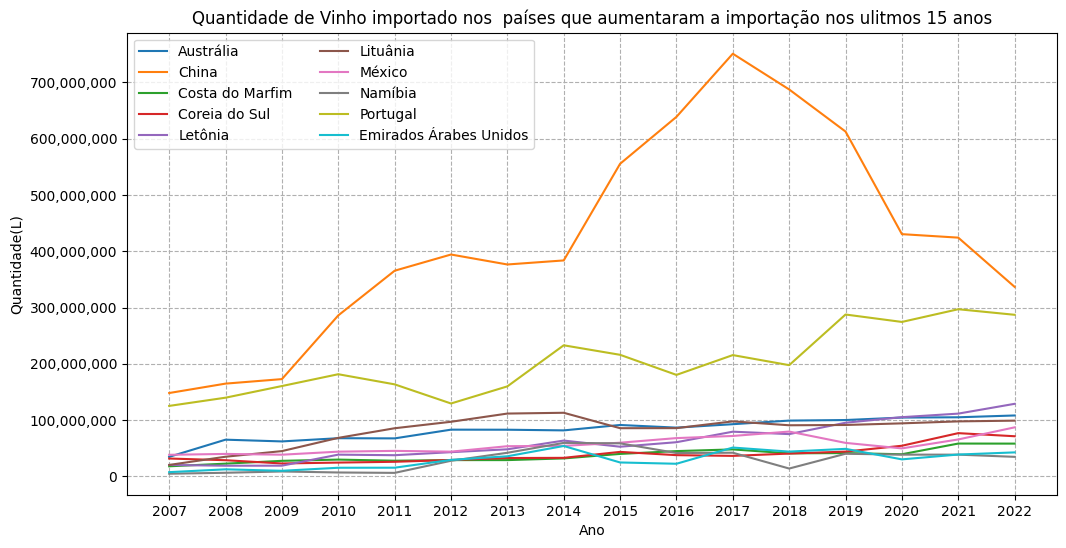

In [1120]:
plt.figure(figsize= (12,6))
axis = sns.lineplot(data = top10_crescimento_importacao , x = "Ano", y ='Quantidade(L)',hue='País')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Quantidade de Vinho importado nos  países que aumentaram a importação nos ulitmos 15 anos')
plt.grid(linestyle = '--')
plt.show()

In [1121]:
# consumo
carg_consumo = carg_consumo.reset_index()
carg_consumo.columns = ['País', 'Taxa de Crescimento Consumo']
# producao
carg_producao = carg_producao.reset_index()
carg_producao.columns = ['País', 'Taxa de Crescimento Produção']
# importacao
carg_importacao = carg_importacao.reset_index()
carg_importacao.columns = ['País', 'Taxa de Crescimento Importação']
#consumo per capita 
consumo_per_capita.drop(['Quantidade(L)','População'],axis = 1,inplace=True)

In [1122]:
df1 = pd.merge(carg_consumo,carg_producao,on='País')
df2 = pd.merge(df1,carg_importacao,on='País')
base_externa = pd.merge(df2,consumo_per_capita,on='País')
base_externa.fillna(0,inplace=True)

In [1124]:
base_externa.columns

Index(['País', 'Taxa de Crescimento Consumo', 'Taxa de Crescimento Produção',
       'Taxa de Crescimento Importação',
       'Consumo Per Capita Média por ano(L)'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
df[['Taxa de Crescimento Consumo', 'Taxa de Crescimento Produção','Taxa de Crescimento Importação'', 'Consumo Per Capita Média por ano(L)']] = scaler.fit_transform(df[['Taxa de Crescimento Consumo', 'Taxa de Crescimento Produção', 'Taxa de Crescimento Importação', 'Consumo Per Capita Média por ano(L)']])